<center>Myranda Swartzwelter
    

In [45]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, gc, warnings, random, math
import time
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

import os, gc, warnings, random, math
from datetime import datetime, timedelta
from joblib import Parallel, delayed
import multiprocessing

from tqdm import tqdm
import time

In [46]:
test_identity_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/test_identity.csv', index_col='TransactionID')
test_transaction_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')
train_identity_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/train_identity.csv', index_col='TransactionID')
train_transaction_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/train_transaction.csv', index_col='TransactionID')



In [47]:
test_identity_df.head()


,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [48]:
test_transaction_df.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
train_identity_df.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [50]:
train_transaction_df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
print('Merging data...')
train = train_transaction_df.merge(train_identity_df, how='left', left_index=True, right_index=True)
test = test_transaction_df.merge(test_identity_df, how='left', left_index=True, right_index=True)
print("Done")

test['isFraud'] = -1

Merging data...
Done


In [52]:
for df in [train, test]:
    for col in ['D1']:
        df[col+'_shift'] = (df[col] - df.TransactionDT // 24 // 3600).fillna(-400)

In [53]:
for df in [train, test]:
    df['uid'] = df['D1_shift'].astype(str)+'_'+df['card1'].astype(str)+'_'+df['addr1'].astype(str)+'_'+df['ProductCD'].astype(str)

In [54]:
START_DATE = datetime.strptime('2017-11-30', '%Y-%m-%d')
train['DT'] = train['TransactionDT'].apply(lambda x: (START_DATE + timedelta(seconds = x)))
test['DT'] = test['TransactionDT'].apply(lambda x: (START_DATE + timedelta(seconds = x)))

def applyParallel(dfGrouped, func):
    retLst = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(group) for name, group in dfGrouped)
    return pd.concat(retLst)

# The function tried to split users having the same uid, cheking the following assumptions:
# - D2 is monotonic for a user
# V307 is a cumulative sum of TransactionAmt over previous 30 days
# V308 is a cumulative sum of TransactionAmt over previous 7 days
# V306 is a cumulative sum of TransactionAmt over previous 24 hours
def cal_sub_id(df_base, eps = 1e-2):
    
    df = df_base.copy()
    df.reset_index(level=0, inplace=True)
    df['sub_id'] = -1

    sub_id = 1
    start_i = 0
    
    while start_i < len(df):
        if df.loc[start_i, 'sub_id'] > 0:
            start_i += 1
            continue
        df.loc[start_i, 'sub_id'] = sub_id
        i1 = start_i
        for i2 in range(i1+1, len(df)):
            if df.loc[i2, 'sub_id'] > 0:
                continue
            cond = (df.index < i2) & (df['sub_id'] == sub_id)
            sum_month = df.loc[(df['DT'] >= df.loc[i2, 'DT'] - timedelta(days=30) ) & cond, "TransactionAmt"].sum()
            sum_week  = df.loc[(df['DT'] >= df.loc[i2, 'DT'] - timedelta(days=7)  ) & cond, "TransactionAmt"].sum()
            sum_day =   df.loc[(df['DT'] >= df.loc[i2, 'DT'] - timedelta(hours=24)) & cond, "TransactionAmt"].sum()
            
            if ((abs(df.loc[i2, 'D1'] - df.loc[i1, 'D1'] - df.loc[i2, 'D3']) < 2 or np.isnan(df.loc[i2, 'D3'])) and \
                ((df.loc[i2, 'D2'] >= df.loc[i1, 'D2']) or np.isnan(df.loc[i2, 'D2']) or np.isnan(df.loc[i1, 'D2'])) and \
                ((df.loc[i2, 'V307'] <= eps + df.loc[i1, 'V307'] + df.loc[i1, 'TransactionAmt'] and df.loc[i2, 'V307'] >= sum_month - eps) or np.isnan(df.loc[i2, 'V307']) or np.isnan(df.loc[i1, 'V307']) ) and \
                ((df.loc[i2, 'V308'] <= eps + df.loc[i1, 'V308'] + df.loc[i1, 'TransactionAmt'] and df.loc[i2, 'V308'] >= sum_week - eps) or np.isnan(df.loc[i2, 'V308']) or np.isnan(df.loc[i1, 'V308']) ) and \
                ((df.loc[i2, 'V306'] <= eps + df.loc[i1, 'V306'] + df.loc[i1, 'TransactionAmt'] and df.loc[i2, 'V306'] >= sum_day - eps) or np.isnan(df.loc[i2, 'V306']) or np.isnan(df.loc[i1, 'V306']) )):
                i1 = i2
                df.loc[i1, 'sub_id'] = sub_id
        sub_id += 1

    return pd.Series(df['sub_id'].values, index=df_base.index)

In [55]:

cols = ['DT', 'isFraud', 'ProductCD', 'D1', 'D2', 'D3', 'D15', 'V306', 'V307', 'V308', 'TransactionAmt', 'uid']

start_time = time.time()
train2 = train[cols].copy()
train2 = pd.merge(train2, applyParallel(train2.groupby(['uid']), cal_sub_id).rename('sub_id'), on=['TransactionID'], how='inner')
print(time.time() - start_time)


start_time = time.time()
test2 = test[cols].copy()
test2 = pd.merge(test2, applyParallel(test2.groupby(['uid']), cal_sub_id).rename('sub_id'), on=['TransactionID'], how='inner')
print(time.time() - start_time)


for df in [train2, test2]:
    df['uid2'] = df['uid'].astype(str) + '_' + df['sub_id'].astype(str)

760.1458919048309
1221.1592268943787


In [56]:
# The same uid contains multiple uid2 values in train and test.
# The following lazy wirtten function tries to map uid2 with most similar medians of TransactionAmt

def closest_val(d, v):
    res_key = None
    res_dist = -1
    for d_key, d_val in d.items():
        dst = abs(d_val - v)
        if res_key is None or dst < res_dist:
            res_key = d_key
            res_dist = dst
    return res_key

def map_ids(df):
    train_df = df[df['isFraud'] != -1]
    test_df  = df[df['isFraud'] == -1]
    
    res = {}
    
    test_match_ids = []
    test_new_ids = []
    for i in test_df['uid2'].unique():
        test_match_ids.append(i)
    
    train_avg = train_df.groupby('uid2')['TransactionAmt'].median().to_dict()
    test_avg  = test_df[test_df['uid2'].isin(test_match_ids)].groupby('uid2')['TransactionAmt'].median().to_dict()
    
    for k, v in test_avg.items():
        if len(train_avg) == 0:
            test_new_ids.append(k)
            continue
        
        tr_key = closest_val(train_avg, v)
        res[k] = tr_key
        del train_avg[tr_key]
        
    for i, k in enumerate(test_new_ids):
        res[k] = k + '_' + f"x{i}"
        
    temp = df[['isFraud', 'uid2']].copy()
    temp.loc[temp['isFraud'] == -1, 'uid2'] = temp.loc[temp['isFraud'] == -1, 'uid2'].map(res)
    
    return temp['uid2']

In [57]:

cols = ['DT', 'isFraud', 'ProductCD', 'D1', 'D3', 'D15', 'V306', 'V307', 'V308', 'TransactionAmt', 'uid', 'sub_id', 'uid2']

start_time = time.time()
temp = train2.append(test2)[cols].copy()
temp = pd.merge(temp, applyParallel(temp.groupby(['uid']), map_ids).rename('uid3'), on=['TransactionID'], how='inner')
print(time.time() - start_time)

train2['uid3'] = temp['uid3'][:len(train2)].values
test2['uid3'] = temp['uid3'][len(train2):].values

668.2249307632446


In [ ]:
cols = ['DT', 'uid3']

train2[cols].to_csv("train_ids.csv")
test2[cols].to_csv("test_ids.csv")

In [27]:
# load the data and merge the dataframes

test_identity_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/test_identity.csv', index_col='TransactionID')
test_transaction_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')
train_identity_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/train_identity.csv', index_col='TransactionID')
train_transaction_df = pd.read_csv('Project_data/project_1/ieee-fraud-detection/train_transaction.csv', index_col='TransactionID')


df_train = train_transaction_df.merge(train_identity_df,on=['TransactionID'],how='left')


#some columns (id) are wrongly labeled in test_identity. We will correct it
id_cols = [col for col in test_identity_df.columns if col[0]+col[1] == 'id']
rename_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}
test_identity_df = test_identity_df.rename(columns=rename_cols)
df_test = test_transaction_df.merge(test_identity_df,on=['TransactionID'],how='left')
df_train.to_csv('Project_data/project_1/ieee-fraud-detection/train_combined.csv',index=False)
df_test.to_csv('Project_data/project_1/ieee-fraud-detection/test_combined.csv',index=False)

df_train = pd.read_csv('data/train_combined.csv')
df_test = pd.read_csv('data/test_combined.csv')
print(df_train.shape)
print(df_test.shape)

In [28]:

def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [29]:
top_missing_cols(df_train)

There are 414 columns in this dataset with missing values.
There are 74 columns with missing percent values than 80%


,col,missing_percent
0,id_24,99.196159
1,id_25,99.130965
2,id_08,99.127070
3,id_07,99.127070
4,id_21,99.126393
5,id_26,99.125715
6,id_27,99.124699
7,id_23,99.124699
8,id_22,99.124699
9,dist2,93.628374


In [31]:
df_train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


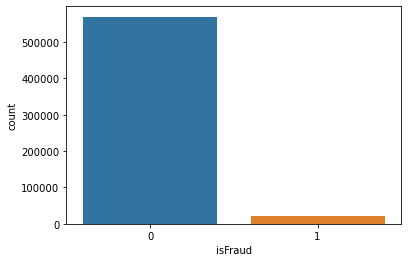

In [33]:
#Plot the data with proper labeling
ax = sns.countplot(x='isFraud',  data=df_train)
plt.show()

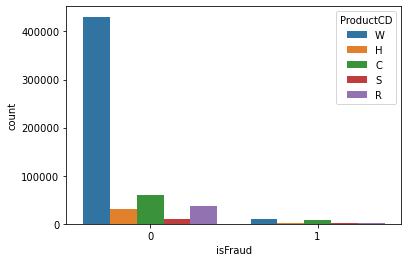

In [35]:
#Plot the data with proper labeling 
ax = sns.countplot(x='isFraud',hue = 'ProductCD',  data=df_train)
plt.show()

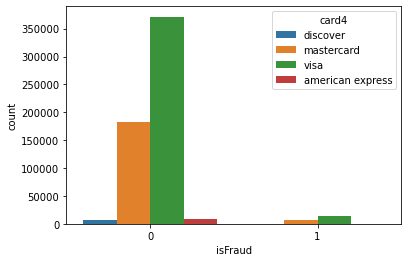

In [37]:
#Plot the data with proper labeling 
ax = sns.countplot(x='isFraud',hue='card4',  data=df_train)
plt.show()

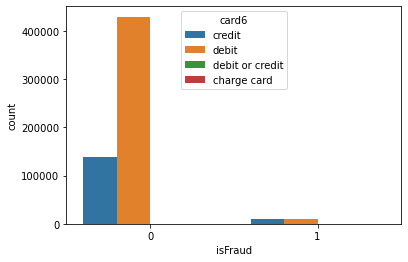

In [38]:
#Plot the data with proper labeling and make some observations on the graph.
ax = sns.countplot(x='isFraud',hue='card6',  data=df_train)
plt.show()

In [39]:
df_train['D1n'] =  df_train['D1'] -   df_train.TransactionDT/np.float32(24*60*60)

# column details
cat_cols = (['ProductCD'] + 
            ['card%d' % i for i in range(1, 7)] + 
            ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain'] + 
            ['M%d' % i for i in range(1, 10)] + 
            ['DeviceType', 'DeviceInfo'] +
            ['id_%d' % i for i in range(12, 39)])


type_map = {c: str for c in cat_cols}
df_train[cat_cols] = df_train[cat_cols].astype(type_map, copy=False)
df_test[cat_cols] = df_test[cat_cols].astype(type_map, copy=False)

######################################################################################

id_cols = ['TransactionID', 'TransactionDT']
target = 'isFraud'

numeric_cols =  [
    'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
    'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 
    'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 
    'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
    'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 
    'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 
    'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 
    'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 
    'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 
    'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 
    'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 
    'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 
    'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 
    'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 
    'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 
    'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 
    'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 
    'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 
    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 
    'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 
    'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 
    'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 
    'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 
    'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 
    'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 
    'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 
    'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 
    'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 
    'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 
    'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 
    'id_09', 'id_10', 'id_11'
]

v_cols_included = ['V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20', 
 'V23', 'V26', 'V27', 'V30', 'V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V56', 'V59', 
 'V62', 'V65', 'V67', 'V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V96', 
 'V98', 'V99', 'V104', 'V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121', 'V123', 'V124', 'V127', 
 'V129', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V165', 'V160', 'V166', 'V178',
 'V176', 'V173', 'V182', 'V187', 'V203', 'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 'V185', 
 'V188', 'V198', 'V210', 'V209', 'V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258', 
 'V257', 'V253', 'V252', 'V260', 'V261', 'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234', 
 'V238', 'V250', 'V271', 'V294', 'V284', 'V285', 'V286', 'V291',
 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289', 'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338']

In [40]:
# droping v cols 
drop_cols = [col for col in df_train.columns if col[0] == 'V' and col not in v_cols_included]

print(f'dropping {len(drop_cols)} columns')
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)

dropping 211 columns


In [42]:
## Train and test split¶
y_train = df_train['isFraud']
X_train = df_train.drop(columns=['isFraud'])
X_test = df_test.copy()

print(X_train.shape)
print(X_test.shape)

(590540, 222)
(506691, 221)


In [ ]:
# Label encoding all cat features
for col in X_train.columns:
    
    if col in cat_cols:
        # label encode all cat columns
        dff = pd.concat([X_train[col],X_test[col]])
        dff,_ = pd.factorize(dff,sort=True)
        if dff.max()>32000: 
            print(col,'needs int32 datatype')
            
        X_train[col] = dff[:len(X_train)].astype('int16')
        X_test[col] = dff[len(X_train):].astype('int16')

In [ ]:
norm_cols = [15, 4, 2, 11, 10]
# NORMALIZE D COLUMNS
for i in range(1,16):
    if i in norm_cols:
      X_train['D'+str(i)+'n'] =  X_train['D'+str(i)] - X_train.TransactionDT/np.float32(24*60*60)
      X_test['D'+str(i)+'n'] = X_test['D'+str(i)] - X_test.TransactionDT/np.float32(24*60*60)

In [ ]:
# Scaling numeric features
for col in X_train.columns:
    if col not in cat_cols and col not in new_cat_cols and col not in rem_cols:
        # min max scalar
        dff = pd.concat([X_train[col],X_test[col]])
        dff = (dff - dff.min())/(dff.max() - dff.min())
        dff.fillna(-1,inplace=True)

        X_train[col] = dff[:len(X_train)]
        X_test[col] = dff[len(X_train):]

del dff

In [ ]:
def model(x_train,y_train,cols):
    idx_train = x_train.index[:int(x_train.shape[0]*0.75)]  
    idx_validation = x_train.index[int(x_train.shape[0]*0.75):]
    
    print(f'fitting model on {len(cols)} columns')
    clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        tree_method='gpu_hist' 
          )
    model = clf.fit(x_train.loc[idx_train,cols], y_train[idx_train], 
            eval_set=[(x_train.loc[idx_validation,cols],y_train[idx_validation])],
            verbose=50, early_stopping_rounds=100)
    del clf
    return m[odel.best_score

In [44]:
xgb_model = xgb.XGBClassifier(objective=binarylogistic, random_state=42)
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[1000,2000],'max_depth':[3,6,12],'subsample':[0.4,0.8]}
clf = xgb.XGBClassifier(missing=-1, learning_rate=0.02,eval_metric='auc', tree_method='gpu_hist',colsample_bytree=0.4)
model = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='roc_auc', verbose=1, cv=3, n_iter=6)
model.fit(x_train,y_train)
    
    

NameError: name 'xgb' is not defined